# NMR Plotting Tutorial 
This tutorial will go through the steps for plotting 2d NMR data using nmrglue and matplotlib.

### Setup and basic plotting

First, the requisite libraries need to be imported. If you don't have these libraries, they can be easily installed with pip or conda. 

In [43]:
import nmrglue as ng
import matplotlib.pyplot as plt

Next, we load the NMR data:

In [6]:
dic, data = ng.pipe.read('test.ft2')

 Before plotting the data, we need to convert the units to ppm. This can be done by using nmrglue's unit conversion object. 

In [7]:
uc_x = ng.pipe.make_uc(dic, data, dim=1)
uc_y = ng.pipe.make_uc(dic, data, dim=0)
x0, x1 = uc_x.ppm_limits()
y0, y1 = uc_y.ppm_limits()

Now, we can set up our contour plot. First, we need to set up the parameters that will define the contour plot. The contour start may need to be tweaked depending on the specific dataset being used.

In [12]:
contour_start   = 30000    # contour level start value
contour_num     = 20       # number of contour levels
contour_factor  = 1.7      # scaling factor between contour levels

cl = [contour_start * contour_factor ** x for x in range(contour_num)]

Finally, we can set up the matplotlib figure and plot the data. The values that we :

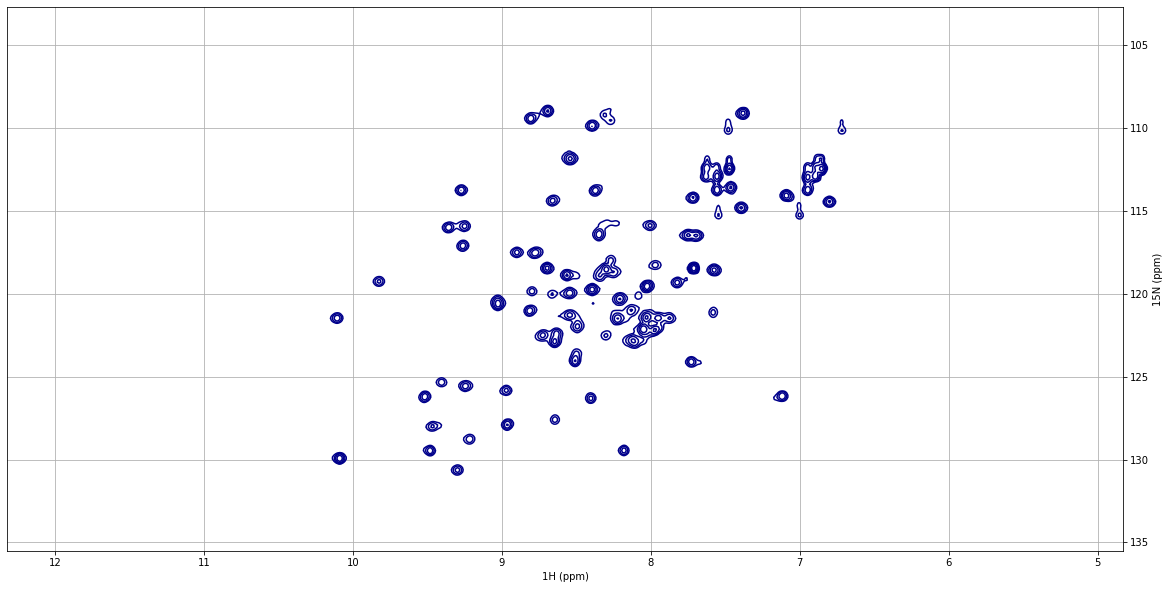

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.contour(data, cl, extent=(x0, x1, y0, y1), colors='darkblue')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("15N (ppm)")
ax.set_xlabel("1H (ppm)")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

As is customary with NMR spectra, the axes are inverted and placed on the right and bottom sides of the plot. In this specific case, the direct dimension is 1H and the indirect dimension is 15N, but this could vary depending on the experiment.

### Peak detection

nmglue also has the ability to automatically detect peaks in the NMR spectrum, which can then be plotted or exported as a list of coordinates.

In [24]:
pthres = 50000
peaks = ng.analysis.peakpick.pick(data, pthres, table=True, algorithm='connected', msep=[0.5,1.5], cluster=True)

The pthres variable determines the threshold level at which a peak will be considered valid. This specific value works for this dataset, but it will probably be different for your own data. There are multiple other parameters that can be changed within the peak-picking function, but I have found that this specific combination works best in many cases. To learn more about the different parameters, visit the nmrglue [documentation](https://nmrglue.readthedocs.io/en/latest/reference/generated/nmrglue.analysis.peakpick.pick.html#nmrglue.analysis.peakpick.pick).

Just like our original contour plot, the peak data must be converted to ppm units in order to be correct. We can do this by reusing the unit conversion object we created earlier. 

In [26]:
peaks_x_ppm = [uc_x.ppm(i) for i in peaks['X_AXIS']]
peaks_y_ppm = [uc_y.ppm(i) for i in peaks['Y_AXIS']]

Now we can plot the peaks on top of the original contour plot as a scatter plot. If everything is correct, the peaks should appear directly on top of the contour peaks. 

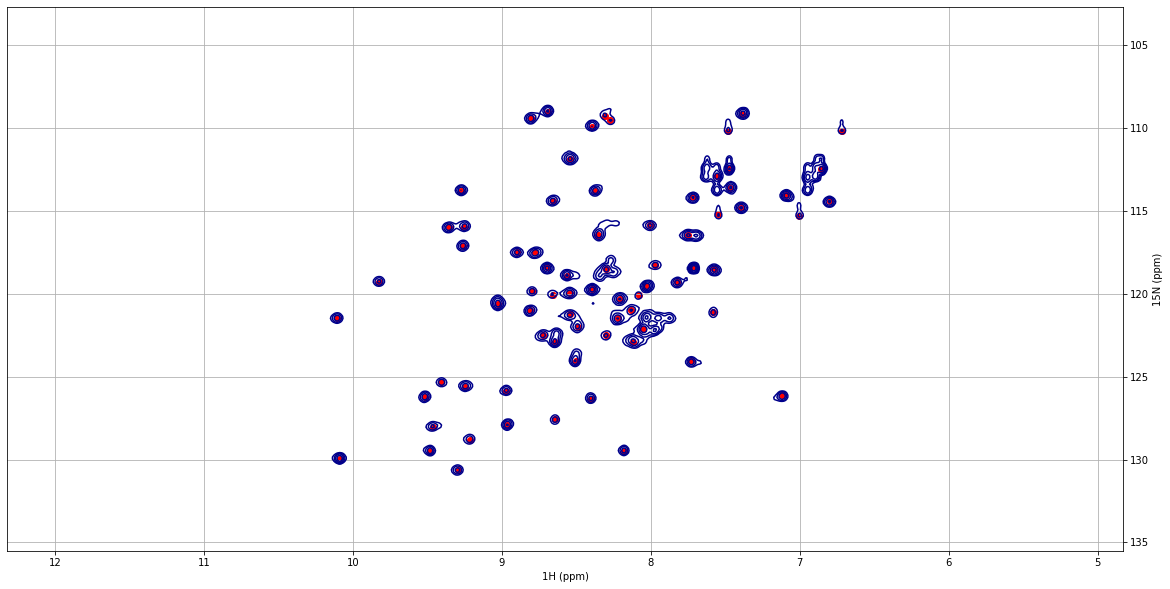

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.contour(data, cl, extent=(x0, x1, y0, y1), colors='darkblue')
ax.scatter(peaks_x_ppm, peaks_y_ppm, color='red')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("15N (ppm)")
ax.set_xlabel("1H (ppm)")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

For analysis purposes, it is also useful to be able to export the peak locations as a csv file. The easiest way to do this is to convert the peaks into a pandas data frame, and then use the pandas to_csv function to export it. Of course, we first need to import pandas to do this.

In [41]:
import pandas as pd

peaks_df = pd.DataFrame(peaks)
peaks_df.to_csv('peaks_list.csv')

The peaks will then be saved as a csv file in the local directory. 

### 1D slices of data

Oftentimes, it is useful to see one-dimensional slices of the two-dimensional data. The following code will outline how to superimpose a 1D slice on top of the contour plot.

In [64]:
y_level = 119.3                                        # ppm level of desired slice

slice_x = [uc_x.ppm(i) for i in range(data.shape[1])]  # x values will just be the width of the data
slice_int = round(uc_y.f(y_level, 'PPM'))              # y level is converted back to frequency and rounded to an integer
slice_y = data.real[slice_int, :]                       # this integer is used to specify the slice index from the NMR data
slice_y = uc_y.ppm(slice_y)                             # y values are this data slice converted back to ppm
slice_y /= 3000                                        # vertical data is scaled down by a factor of 3000 (can be any value)
slice_y += y_level                                     # data is vertically translated to the corresponding level on the contour plot

Now that the data is specified for the slice, it can be plotted with the contour plot.

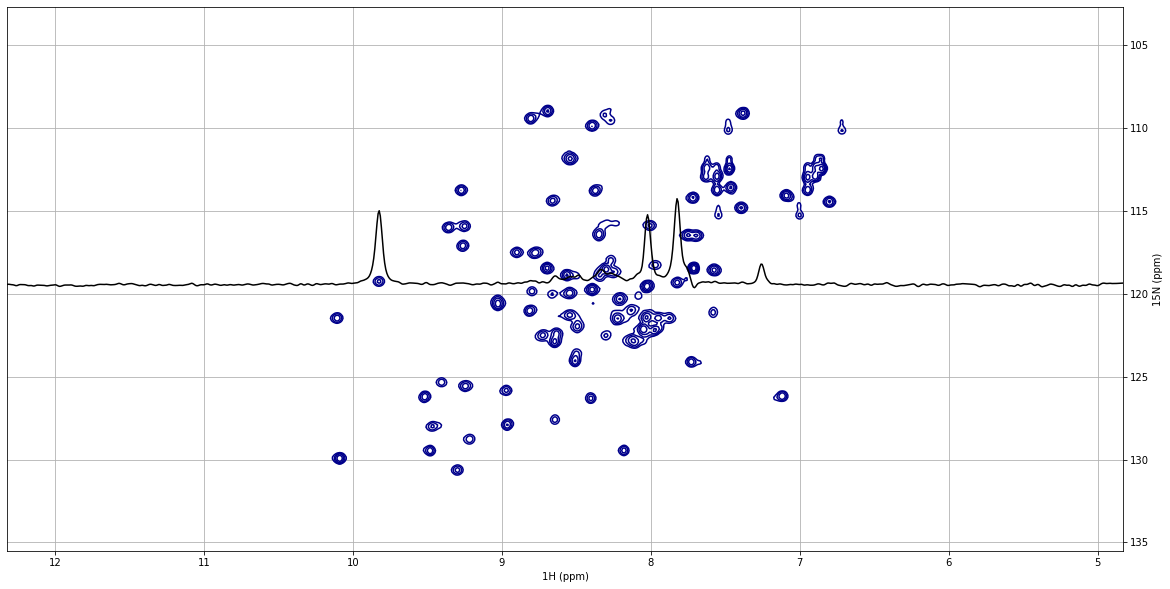

In [65]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.contour(data, cl, extent=(x0, x1, y0, y1), colors='darkblue')
ax.plot(slice_x, slice_y, color='black')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("15N (ppm)")
ax.set_xlabel("1H (ppm)")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()
plt.show()

The same can be easily done for vertical slices:

In [88]:
x_level = 10.1

slice_y = [uc_y.ppm(i) for i in range(data.shape[0])]  
slice_int = round(uc_x.f(x_level, 'PPM'))              
slice_x = data.real[: , slice_int]                       
slice_x = uc_x.ppm(slice_x)                             
slice_x /= 3000                                        
slice_x += x_level          

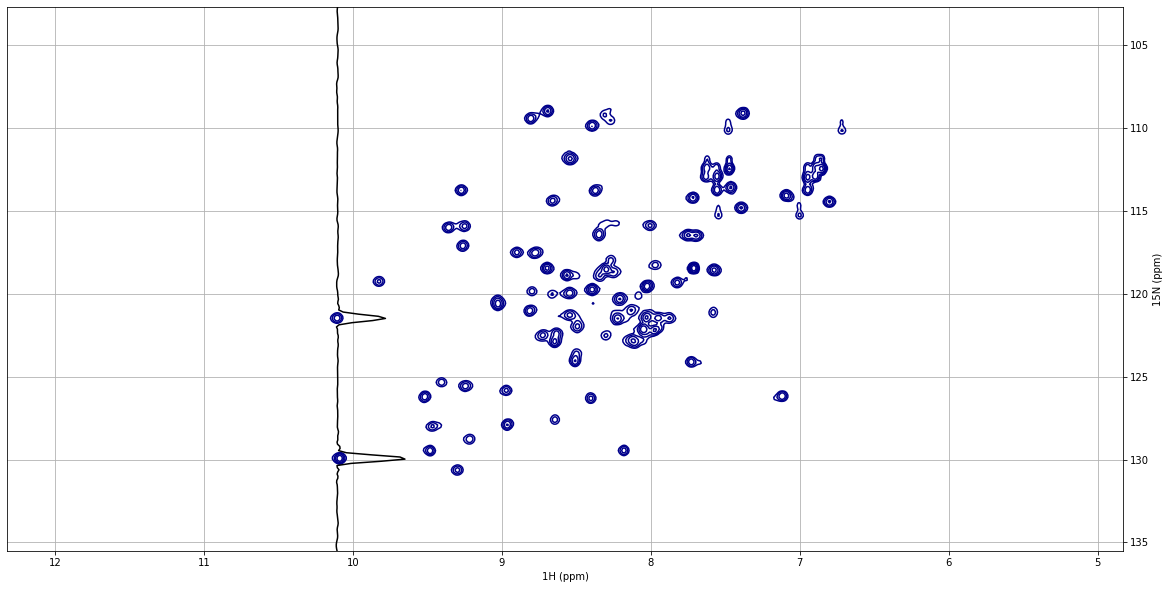

In [89]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.contour(data, cl, extent=(x0, x1, y0, y1), colors='darkblue')
ax.plot(slice_x, slice_y, color='black')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylabel("15N (ppm)")
ax.set_xlabel("1H (ppm)")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid()
plt.show()